End-to-End Machine Learning
The goal here is to perform an end-to-end ML analysis for the "Bank
Marketing" dataset from kaggle, predicting the "y" feature. 

 **Explanation:** For EDA I am using the pandas library for the dataframe. Downloaded the dataset via the url. I wanted to get a feel for the dataset.I used the head function to view the first five rows. I used the info and describe functions to view other metrics. I used a correlation matrix to understand and vizualize the linear relationships between numeric features. It gives us direction and magnatude. I used a few different visuals for exploration of the data.

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

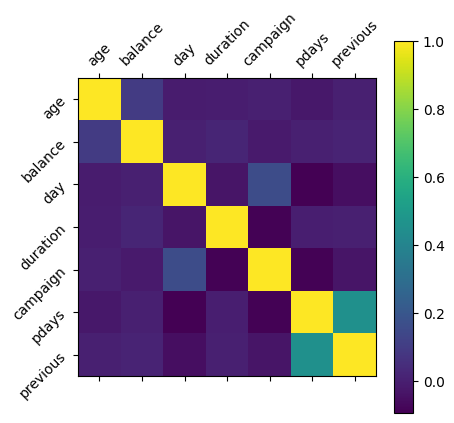

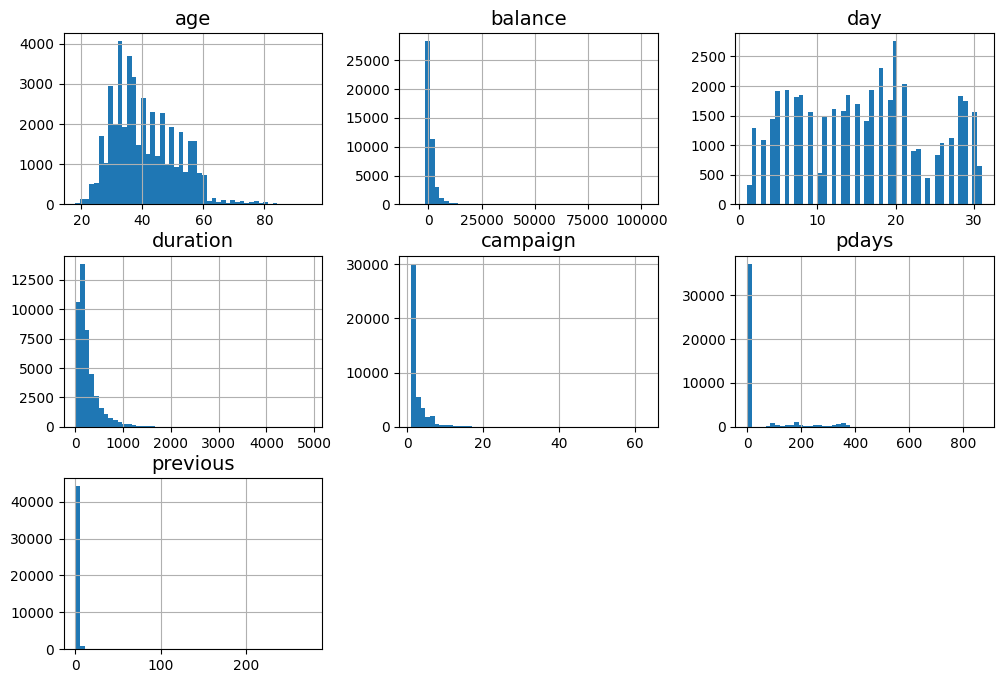

In [2]:
!pip install wget
import wget
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
filename = wget.download(url)

# Unzip the dataset
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(".")

# Read the data into a Pandas DataFrame
df = pd.read_csv("bank-full.csv", sep=";")

# A look at the first five rows
print(df.head())

# Getting a sense of the data in each column
df.describe()

df.info()

# Correlation matrix

# Ensure only numeric features are considered for our models
numeric_features = df.select_dtypes(include=[np.number]).columns

# Correlation matrix of numeric features
corr_matrix = df[numeric_features].corr()
plt.matshow(corr_matrix)

# Setting x and y axis labels
plt.xticks(range(len(numeric_features)), numeric_features, rotation=45)
plt.yticks(range(len(numeric_features)), numeric_features, rotation=45)

# Adding a colorbar and displaying the plot
plt.colorbar()
plt.show()

# Histogram
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10


df.hist(bins=50, figsize=(12, 8))
plt.show()

2. **Data Preparation**
	- Handle nulls.
	- Scale variables as necessary.
	- Encode variables as necessary.
	- Drop features you don't want.
	- Generate additional features if you want.

**Explanation:** For data preparation, we start with identifying the nulls. We decide how much of a factor they will play in our calculation. So we get rid of them through removal. We could also impute the data with values such as mean or something similar.

It is important to make sure each feature or attribute is to scale. We don't want some of the features with extremely high metrics of measurement dominating the calculation, so we weight them.

All of our feature values need to be numeric for our model selection, so we need to encode our numeric data as well as the non-numeric data if we can.

This is where we check for outliers in each attribute. We use Z-score and IQR methods in order to identify outliers. Once our outliers are revealed, we can move on with the deletion of outliers. We can also get rid of features that are not necessary by using column deletion.



In [3]:
# Find all the columns with at least one NaN
df[pd.isnull(df).any(axis=1)].head()
print(df.isnull().sum())

# Remove all NaN columns, they are non-numeric and we don't want them.
# Imputation is also an option.
df = df.dropna()

# Detecting outliers using Z-score
from scipy.stats import zscore
df['Z_Score_age'] = zscore(df['age'])
outliers_z_score = df[np.abs(df['Z_Score_age']) > 3]

df['Z_Score_balance'] = zscore(df['balance'])
outliers_z_score = df[np.abs(df['Z_Score_balance']) > 3]

df['Z_Score_day'] = zscore(df['day'])
outliers_z_score = df[np.abs(df['Z_Score_day']) > 3]

df['Z_Score_duration'] = zscore(df['duration'])
outliers_z_score = df[np.abs(df['Z_Score_duration']) > 3]

df['Z_Score_campaign'] = zscore(df['campaign'])
outliers_z_score = df[np.abs(df['Z_Score_campaign']) > 3]

df['Z_Score_pdays'] = zscore(df['pdays'])
outliers_z_score = df[np.abs(df['Z_Score_pdays']) > 3]

df['Z_Score_previous'] = zscore(df['previous'])
outliers_z_score = df[np.abs(df['Z_Score_previous']) > 3]
print(outliers_z_score) # I  realize I could have done this differently using 'numeric_features'

# Detecting outliers using IQR method
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))]

# Print the number of outliers detected
print(f"Number of outliers detected using IQR method: {len(outliers_iqr)}")

# Remove outliers
df = df[~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Reset row indexes in case any rows were dropped
df = df.reset_index(drop=True)
df.head()

# Scaling variables so one feature does not over power the whole, giving nonrepresentative data to work with
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select only numeric features for scaling
# Our models will require numeric values
numeric_features = df.select_dtypes(include=['number']).columns

# Check if df[numeric_features] is empty before scaling
if df[numeric_features].empty:
    print("DataFrame is empty after outlier removal and dropping columns. Cannot scale.")
else:
    df_scaled = scaler.fit_transform(df[numeric_features])

    # Encoding features
    from sklearn.preprocessing import LabelEncoder # Fixed indentation here
    le = LabelEncoder()
    df['y'] = le.fit_transform(df['y'])

    # DataFrame with scaled numeric features and original non-numeric features so the data is more readable
    df_scaled = pd.DataFrame(df_scaled, columns=numeric_features, index=df.index)

    # Drop original numeric features from df
    #df = df.drop(columns=numeric_features)

    # Delete multiple columns that we dont want
    columns_to_drop = ['index', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Concatenate scaled and non-numeric features combining df and df_scaled dataframes
    df = pd.concat([df, df_scaled], axis=1)
    print(df)

    # Save new csv
    df.to_csv("bank-full.csv", index=False)

    # See svaed file
    #!ls -l

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
       age           job   marital  education default  balance housing loan  \
24136   34    management   married   tertiary      no     1770     yes   no   
24295   35    technician  divorced   tertiary      no     1718     yes  yes   
24331   36    management   married   tertiary      no     5057     yes   no   
24506   42    unemployed   married    unknown      no      970     yes   no   
24556   44    management   married   tertiary      no     1451     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45171   33        admin.    single  secondary      no      690      no   no   
45172   30    technician    single   tertiary      no     2325      no   no   
45199   34   blue-col

3. **Model Selection**
	- For this problem, I'd like you to try two models:
	  - A `DecisionTreeClassifier`
	  - An `SGDClassifier`

**Explanation:** Now, that we have clean/representative data, we can move along to model selection. Using sklearn I imported the train test split function that divides the data into two groups, train and test. I imported both classifiers and plugged in our dataframe. The results showed SGDC Classifier to be the best model for the data at 92.8% as opposed to Decission Trees at 90%.

In [12]:
## SGDC Classifer##
# Import train_test_split
from sklearn.model_selection import train_test_split

# Prepare data for modeling
X = df.drop('y', axis=1)
y = df['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SGDClassifier
# Import SGDClassifier if it's not already imported
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss='log_loss', random_state=42)
sgd_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = sgd_classifier.predict(X_test)

# Evaluate the model
# Import accuracy_score and classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9287107643199148
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5331
           1       0.16      0.07      0.10       308

    accuracy                           0.93      5639
   macro avg       0.56      0.53      0.53      5639
weighted avg       0.91      0.93      0.92      5639

Confusion Matrix:
[[5214  117]
 [ 285   23]]


In [11]:
##DecisionTreeClassifier##
# Import train_test_split
from sklearn.model_selection import train_test_split

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import accuracy_score and classification_report from sklearn.metrics
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data for the model
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9037063309097357
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5331
           1       0.18      0.21      0.19       308

    accuracy                           0.90      5639
   macro avg       0.57      0.58      0.57      5639
weighted avg       0.91      0.90      0.91      5639



The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y). Output variable (desired target): y - has the client subscribed a term deposit? (binary: "yes","no")

4. **Evaluation**
	- Use a cross validation scorer with 5-fold cross validation to determine accuracy for both models.


**Explanation:** I imported both classifiers and plugged in our saved dataframe. The results showed SGDC Classifier to be the best model for the data at 92.8% as opposed to Decission Trees at 90%. For both models, each folds values were close to one another indicating a good model.

In [7]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

scoring = {
    'f1': 'f1_macro',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro')
}

# Using multiple metrics
# Changed 'sgd_clf' to 'sgd_classifier' and 'y_5' to 'y'
scores = cross_validate(sgd_classifier, X, y,
                        cv=5,
                        scoring=scoring,
                        return_train_score=True)
print(scores)

scores = cross_validate(dt_classifier, X, y,
                        cv=5,
                        scoring=scoring,
                        return_train_score=True)
print(scores)

# Print the mean value for each scoring metric and a confidence interval
for key, values in scores.items():
    print(f"{key}: {values.mean():.3f} (+/- {values.std() * 2:.3f})")



{'fit_time': array([0.75556946, 0.87918663, 0.7273798 , 0.78307676, 1.49416399]), 'score_time': array([0.01929021, 0.01838279, 0.01850319, 0.04160905, 0.04581285]), 'test_f1': array([0.49474401, 0.52279106, 0.50590202, 0.48737614, 0.48094274]), 'train_f1': array([0.48848623, 0.53926485, 0.49542054, 0.49181069, 0.51445539]), 'test_precision': array([0.84687223, 0.57020809, 0.66660242, 0.49342212, 0.47113997]), 'train_precision': array([0.67172197, 0.64830977, 0.58298875, 0.49895683, 0.53459357]), 'test_recall': array([0.5045935 , 0.51879583, 0.50990347, 0.49949934, 0.49116209]), 'train_recall': array([0.50142271, 0.52882795, 0.50432144, 0.49978132, 0.5130857 ])}
{'fit_time': array([0.5626564 , 0.5558846 , 0.41693783, 0.38403654, 0.51509476]), 'score_time': array([0.02119923, 0.01781631, 0.0136857 , 0.01395631, 0.02162123]), 'test_f1': array([0.52364509, 0.54804684, 0.54187283, 0.5711698 , 0.54342001]), 'train_f1': array([1., 1., 1., 1., 1.]), 'test_precision': array([0.5221807 , 0.54444

5. **Tuning**
	- Use `GridSearchCV` to tune the best of the two classifiers above. Use 3-fold cross-validation to save time, and test at least 9 parameter combinations.


**Explanation:** Using GridSearch to tune the best of the two models, which was SGDC Classifier. First, I need to set the parameters, at least 9. I use the alpha parameter for regularization. Alpha controls the regularization strength of the model. After tuning, the accuracy of the prediction has gone up to 93.5%. Postively predicts 'true's and negative 'no's.

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Define the parameter grid to search
param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [10000, 50000, 100000]
}

# Initialize the SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(sgd_classifier, param_grid, cv=3, scoring='f1_macro')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_sgd_classifier = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_sgd_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Best Model: {accuracy}")
print(classification_report(y_test, y_pred))

Best Parameters: {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 10000, 'penalty': 'l1'}
Accuracy of Best Model: 0.935094874977833
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5331
           1       0.23      0.08      0.12       308

    accuracy                           0.94      5639
   macro avg       0.59      0.53      0.54      5639
weighted avg       0.91      0.94      0.92      5639



6. **Conclusion**
	- This is just a markdown section. Report your best model and it's performance. Provide two or three ideas for how we might further improve our predictions.


Output variable (desired target): y - has the client subscribed a term deposit? (binary: "yes","no")

**Explanation:** The SGDC Classifier is the best model for our data. This model had a high accuraccy rate of predicting y corrercly at 93.5% after tuning with GridSearch. The precission of the prediction is 95% accuracy of positve predictions made. The high recall number tells us that the model correctly predict most of the clients want to sign up. The F-1 Score is the average of precission and recall. High F-1 Scores means that it is accurate in making positive predictions.

